# Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df=pd.read_csv('E:/Dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Exploraion

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

0

# Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

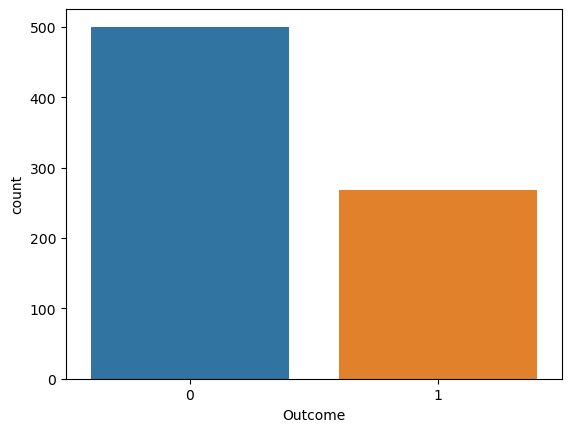

In [6]:
sns.countplot(x='Outcome',data=df)

# Splitting Data

In [7]:
x=df.drop('Outcome',axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
y=df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Buildig Models 


# 1-KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
# call Model 
knn_model=KNeighborsClassifier()

# hyperparametertuning 
params={
   'n_neighbors':list(range(1,25)),
    'p':[1,2],
    'weights':['uniform','distance']
}
#call GridSearch model
grid_search=GridSearchCV(knn_model,params, cv=5)
# fir gridsearch
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
0.7394242303078769


In [11]:
# apply the best params on Knn model 

# call KNN with the best params 
knn_model=KNeighborsClassifier(n_neighbors= 18, p= 1, weights='uniform')
# fit model on training data 
knn_model.fit(x_train,y_train)

# prediction of x_test
y_pred=knn_model.predict(x_test)

# prediction of x_train
training_pred=knn_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:')
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154

classification_report of training:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       393
           1       0.77      0.53      0.63       221

    accuracy                           0.77       614
   macro avg       0.77      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



# 2-naive bayes


In [12]:
from sklearn.naive_bayes import GaussianNB
# call Model 
NB_model=GaussianNB()

# hyperparametertuning 
params={
   'var_smoothing':np.logspace(0,-2,num=100)
    
}
#call GridSearch model
grid_search=GridSearchCV(NB_model,params, cv=5)
# fir gridsearch
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'var_smoothing': 0.011497569953977356}
0.7442889510862322


In [13]:
# apply the best params on NB model 

# call NB with the best params 
NB_model=GaussianNB(var_smoothing=0.7442889510862322)
# fit model on training data 
NB_model.fit(x_train,y_train)

# prediction of x_test
y_pred=NB_model.predict(x_test)

# prediction of x_train
training_pred=NB_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:')
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.71      0.99      0.82       107
           1       0.75      0.06      0.12        47

    accuracy                           0.71       154
   macro avg       0.73      0.53      0.47       154
weighted avg       0.72      0.71      0.61       154

classification_report of training:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       393
           1       0.62      0.07      0.13       221

    accuracy                           0.65       614
   macro avg       0.63      0.52      0.46       614
weighted avg       0.64      0.65      0.55       614



# 3-SVM

In [18]:
from sklearn.svm import SVC
# call Model 
svm_model=SVC()

# hyperparametertuning 
params={
   'kernel':['linear','rbf','poly'],
    'C':[1,0.1,0.01],    
}
#call GridSearch model
grid_search=GridSearchCV(svm_model,params)
# fir gridsearch
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'kernel': 'linear'}
0.759016393442623


In [19]:
# apply the best params on NB model 
svm_model=SVC(kernel='linear',C=1)

# call NB with the best params 
# fit model on training data 
svm_model.fit(x_train,y_train)

# prediction of x_test
y_pred=svm_model.predict(x_test)

# prediction of x_train
training_pred=svm_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:')
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

classification_report of training:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       393
           1       0.72      0.57      0.64       221

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



# 4-DecisionTree

In [20]:
from sklearn.tree import DecisionTreeClassifier
# call Model 
DT_model=DecisionTreeClassifier()

# hyperparametertuning 
params={
   'max_depth':[5,10,20,25],
    'min_samples_leaf':[10,20,30,40],  
    'criterion':['gini','entropy']
}
#call GridSearch model
grid_search=GridSearchCV(DT_model,params)
# fir gridsearch
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}
0.7393975743036119


In [21]:
# apply the best params on NB model 
DT_model=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=30)

# call NB with the best params 
# fit model on training data 
DT_model.fit(x_train,y_train)

# prediction of x_test
y_pred=DT_model.predict(x_test)

# prediction of x_train
training_pred=DT_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:')
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

classification_report of training:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       393
           1       0.71      0.68      0.70       221

    accuracy                           0.79       614
   macro avg       0.77      0.76      0.76       614
weighted avg       0.78      0.79      0.78       614



# 5-logistic regression 


In [22]:
from sklearn.linear_model import LogisticRegression
# call Model 
LR_model=LogisticRegression()

# hyperparametertuning 
params={
   'penalty':['l1','l2','elasticnet'],
    'C':[1.0,0.1,0.01,0.001],  
    'solver':['1bfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
}
#call GridSearch model
grid_search=GridSearchCV(LR_model,params)
# fir gridsearch
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.7622684259629481


In [23]:
# apply the best params on LR model 
LR_model=LogisticRegression(C=1.0, penalty='l1', solver='liblinear')

# call LR with the best params 
# fit model on training data 
LR_model.fit(x_train,y_train)

# prediction of x_test
y_pred=LR_model.predict(x_test)

# prediction of x_train
training_pred=LR_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:')
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

classification_report of training:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       393
           1       0.71      0.57      0.63       221

    accuracy                           0.76       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.76      0.75       614



# 6- Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
# call Model 
Rf_model=RandomForestClassifier()

# hyperparametertuning 
params={
   'criterion':['gini','entropy'],
    'max_depth':[10,15,20],  
    'n_estimators':[50,100,150,200],
    'max_features':['sqrt','log2']
}
#call GridSearch model
grid_search=GridSearchCV(Rf_model,params)
# fir gridsearch
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
0.7655204584832733


In [25]:
# apply the best params on RF model 
Rf_model=RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', n_estimators= 50)

# call RF with the best params 
# fit model on training data 
Rf_model.fit(x_train,y_train)
Rf_model.fit(x_train,y_train)


# prediction of x_test
y_pred=Rf_model.predict(x_test)

# prediction of x_train
training_pred=Rf_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:') 
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

classification_report of training:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       393
           1       0.99      0.98      0.99       221

    accuracy                           0.99       614
   macro avg       0.99      0.99      0.99       614
weighted avg       0.99      0.99      0.99       614



In [26]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Feature Selection 


In [27]:
Rf_model=RandomForestClassifier()
Rf_model.fit(x_train,y_train)


RandomForestClassifier()

In [28]:
feature_scores=pd.Series(Rf_model.feature_importances_,
                        index=x_train.columns).sort_values(ascending=False)

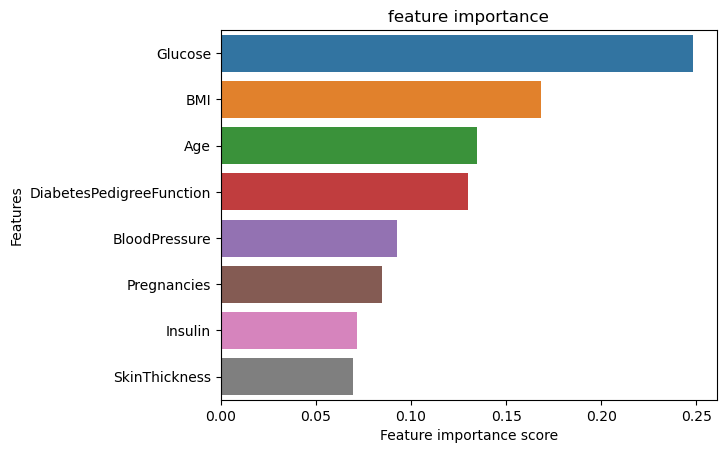

In [30]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('feature importance')
plt.show()

In [31]:
y=df['Outcome']
x=df.drop(columns=['Outcome','SkinThickness'],axis=1)

In [32]:
x.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
# apply the best params on RF model 
Rf_model=RandomForestClassifier()
# call RF with the best params 
# fit model on training data 
Rf_model.fit(x_train,y_train)

# prediction of x_test
y_pred=Rf_model.predict(x_test)

# prediction of x_train
training_pred=Rf_model.predict(x_train)

# print classification report of testing 
print('classification_report of testing:') 
print(classification_report(y_test,y_pred))

# print classification report of testing 
print('classification_report of training:')
print(classification_report(y_train,training_pred))


classification_report of testing:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154

classification_report of training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

